## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.428063 -0.104320 -0.465281 -0.629000  0.125297 -0.595759
1 -1.231518  0.285926  1.575078  0.054934  1.653572  0.476330
2  1.642889 -0.343534  0.386736  0.255605 -0.730584  0.576833
3  0.282025  1.672047  0.127473 -1.080183 -0.185335 -0.050177
4 -1.230848  1.693142 -1.769837  1.151793 -0.768205  0.989942


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0098134	total: 66.4ms	remaining: 1m 6s
1:	learn: 1.0011153	total: 67ms	remaining: 33.5s
2:	learn: 0.9895371	total: 67.6ms	remaining: 22.5s
3:	learn: 0.9784832	total: 68.2ms	remaining: 17s
4:	learn: 0.9703092	total: 68.7ms	remaining: 13.7s
5:	learn: 0.9620849	total: 69ms	remaining: 11.4s
6:	learn: 0.9508839	total: 69.4ms	remaining: 9.84s
7:	learn: 0.9412387	total: 70ms	remaining: 8.68s
8:	learn: 0.9323271	total: 70.7ms	remaining: 7.79s
9:	learn: 0.9242951	total: 71.2ms	remaining: 7.05s
10:	learn: 0.9154658	total: 71.7ms	remaining: 6.45s
11:	learn: 0.9054351	total: 72.2ms	remaining: 5.94s
12:	learn: 0.8956737	total: 72.5ms	remaining: 5.5s
13:	learn: 0.8864426	total: 72.9ms	remaining: 5.14s
14:	learn: 0.8796807	total: 73.5ms	remaining: 4.83s
15:	learn: 0.8724464	total: 74ms	remaining: 4.55s
16:	learn: 0.8647354	total: 74.4ms	remaining: 4.3s
17:	learn: 0.8574432	total: 74.9ms	remaining: 4.08s
18:	learn: 0.8483294	total: 75.4ms	remaining: 3.89s
19:	

64:	learn: 0.5566141	total: 105ms	remaining: 1.51s
65:	learn: 0.5516147	total: 106ms	remaining: 1.5s
66:	learn: 0.5469634	total: 106ms	remaining: 1.48s
67:	learn: 0.5430159	total: 107ms	remaining: 1.47s
68:	learn: 0.5382910	total: 107ms	remaining: 1.45s
69:	learn: 0.5332180	total: 108ms	remaining: 1.43s
70:	learn: 0.5293352	total: 108ms	remaining: 1.42s
71:	learn: 0.5260366	total: 109ms	remaining: 1.4s
72:	learn: 0.5212995	total: 109ms	remaining: 1.39s
73:	learn: 0.5166203	total: 110ms	remaining: 1.37s
74:	learn: 0.5118202	total: 110ms	remaining: 1.36s
75:	learn: 0.5076242	total: 111ms	remaining: 1.34s
76:	learn: 0.5044110	total: 111ms	remaining: 1.33s
77:	learn: 0.5004487	total: 112ms	remaining: 1.32s
78:	learn: 0.4971478	total: 112ms	remaining: 1.31s
79:	learn: 0.4927511	total: 112ms	remaining: 1.29s
80:	learn: 0.4886414	total: 113ms	remaining: 1.28s
81:	learn: 0.4845970	total: 113ms	remaining: 1.27s
82:	learn: 0.4805265	total: 114ms	remaining: 1.26s
83:	learn: 0.4757940	total: 114ms

223:	learn: 0.1753860	total: 189ms	remaining: 655ms
224:	learn: 0.1744186	total: 190ms	remaining: 653ms
225:	learn: 0.1732255	total: 190ms	remaining: 651ms
226:	learn: 0.1720700	total: 191ms	remaining: 649ms
227:	learn: 0.1709454	total: 191ms	remaining: 647ms
228:	learn: 0.1697301	total: 192ms	remaining: 646ms
229:	learn: 0.1684491	total: 193ms	remaining: 645ms
230:	learn: 0.1671199	total: 193ms	remaining: 643ms
231:	learn: 0.1657676	total: 194ms	remaining: 641ms
232:	learn: 0.1645155	total: 194ms	remaining: 639ms
233:	learn: 0.1633928	total: 195ms	remaining: 637ms
234:	learn: 0.1623488	total: 195ms	remaining: 635ms
235:	learn: 0.1612141	total: 196ms	remaining: 633ms
236:	learn: 0.1601784	total: 196ms	remaining: 632ms
237:	learn: 0.1593074	total: 197ms	remaining: 630ms
238:	learn: 0.1581453	total: 197ms	remaining: 628ms
239:	learn: 0.1571053	total: 198ms	remaining: 627ms
240:	learn: 0.1559633	total: 198ms	remaining: 625ms
241:	learn: 0.1546708	total: 199ms	remaining: 623ms
242:	learn: 

430:	learn: 0.0555900	total: 290ms	remaining: 382ms
431:	learn: 0.0555096	total: 290ms	remaining: 382ms
432:	learn: 0.0551457	total: 291ms	remaining: 381ms
433:	learn: 0.0550670	total: 291ms	remaining: 380ms
434:	learn: 0.0547505	total: 292ms	remaining: 379ms
435:	learn: 0.0543960	total: 292ms	remaining: 378ms
436:	learn: 0.0543193	total: 293ms	remaining: 377ms
437:	learn: 0.0542436	total: 293ms	remaining: 376ms
438:	learn: 0.0538798	total: 293ms	remaining: 375ms
439:	learn: 0.0535598	total: 294ms	remaining: 374ms
440:	learn: 0.0534863	total: 294ms	remaining: 373ms
441:	learn: 0.0530982	total: 295ms	remaining: 372ms
442:	learn: 0.0527178	total: 296ms	remaining: 372ms
443:	learn: 0.0523883	total: 296ms	remaining: 371ms
444:	learn: 0.0523178	total: 297ms	remaining: 370ms
445:	learn: 0.0519746	total: 297ms	remaining: 369ms
446:	learn: 0.0516529	total: 298ms	remaining: 368ms
447:	learn: 0.0515843	total: 298ms	remaining: 368ms
448:	learn: 0.0512323	total: 299ms	remaining: 367ms
449:	learn: 

590:	learn: 0.0276395	total: 373ms	remaining: 258ms
591:	learn: 0.0275192	total: 374ms	remaining: 258ms
592:	learn: 0.0274007	total: 374ms	remaining: 257ms
593:	learn: 0.0272529	total: 375ms	remaining: 256ms
594:	learn: 0.0271157	total: 375ms	remaining: 255ms
595:	learn: 0.0270858	total: 376ms	remaining: 255ms
596:	learn: 0.0269703	total: 376ms	remaining: 254ms
597:	learn: 0.0268386	total: 377ms	remaining: 253ms
598:	learn: 0.0267131	total: 377ms	remaining: 252ms
599:	learn: 0.0265998	total: 377ms	remaining: 252ms
600:	learn: 0.0264719	total: 378ms	remaining: 251ms
601:	learn: 0.0263417	total: 379ms	remaining: 251ms
602:	learn: 0.0262466	total: 379ms	remaining: 250ms
603:	learn: 0.0261362	total: 380ms	remaining: 249ms
604:	learn: 0.0260292	total: 380ms	remaining: 248ms
605:	learn: 0.0258996	total: 381ms	remaining: 248ms
606:	learn: 0.0258138	total: 382ms	remaining: 247ms
607:	learn: 0.0256884	total: 382ms	remaining: 246ms
608:	learn: 0.0255661	total: 382ms	remaining: 246ms
609:	learn: 

802:	learn: 0.0125933	total: 474ms	remaining: 116ms
803:	learn: 0.0125526	total: 475ms	remaining: 116ms
804:	learn: 0.0125221	total: 475ms	remaining: 115ms
805:	learn: 0.0124470	total: 477ms	remaining: 115ms
806:	learn: 0.0124052	total: 477ms	remaining: 114ms
807:	learn: 0.0123576	total: 478ms	remaining: 114ms
808:	learn: 0.0123170	total: 478ms	remaining: 113ms
809:	learn: 0.0122640	total: 479ms	remaining: 112ms
810:	learn: 0.0122054	total: 479ms	remaining: 112ms
811:	learn: 0.0121761	total: 479ms	remaining: 111ms
812:	learn: 0.0121302	total: 480ms	remaining: 110ms
813:	learn: 0.0121030	total: 480ms	remaining: 110ms
814:	learn: 0.0120311	total: 481ms	remaining: 109ms
815:	learn: 0.0119804	total: 481ms	remaining: 108ms
816:	learn: 0.0119240	total: 482ms	remaining: 108ms
817:	learn: 0.0118802	total: 482ms	remaining: 107ms
818:	learn: 0.0118519	total: 482ms	remaining: 107ms
819:	learn: 0.0118092	total: 483ms	remaining: 106ms
820:	learn: 0.0117722	total: 483ms	remaining: 105ms
821:	learn: 

958:	learn: 0.0076250	total: 558ms	remaining: 23.9ms
959:	learn: 0.0075984	total: 559ms	remaining: 23.3ms
960:	learn: 0.0075762	total: 559ms	remaining: 22.7ms
961:	learn: 0.0075432	total: 560ms	remaining: 22.1ms
962:	learn: 0.0075313	total: 560ms	remaining: 21.5ms
963:	learn: 0.0075196	total: 561ms	remaining: 20.9ms
964:	learn: 0.0074824	total: 561ms	remaining: 20.3ms
965:	learn: 0.0074669	total: 561ms	remaining: 19.8ms
966:	learn: 0.0074555	total: 562ms	remaining: 19.2ms
967:	learn: 0.0074403	total: 562ms	remaining: 18.6ms
968:	learn: 0.0074083	total: 563ms	remaining: 18ms
969:	learn: 0.0073971	total: 563ms	remaining: 17.4ms
970:	learn: 0.0073614	total: 564ms	remaining: 16.8ms
971:	learn: 0.0073397	total: 564ms	remaining: 16.3ms
972:	learn: 0.0073126	total: 565ms	remaining: 15.7ms
973:	learn: 0.0073017	total: 566ms	remaining: 15.1ms
974:	learn: 0.0072752	total: 566ms	remaining: 14.5ms
975:	learn: 0.0072644	total: 566ms	remaining: 13.9ms
976:	learn: 0.0072539	total: 567ms	remaining: 13

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

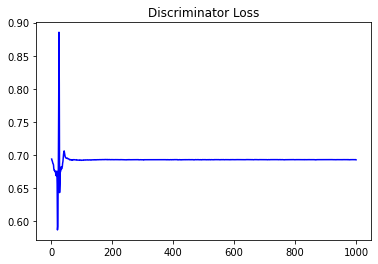

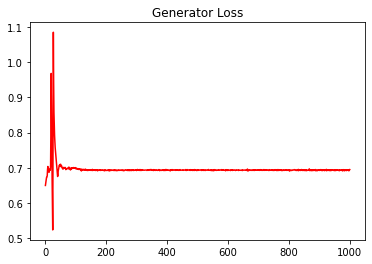

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02514904617114086


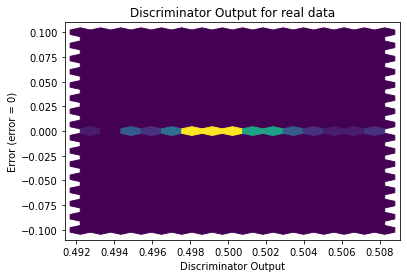

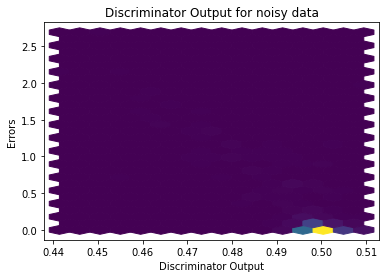

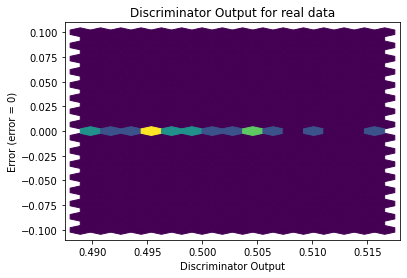

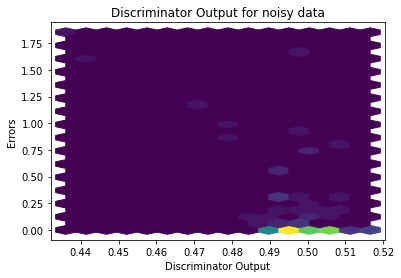

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


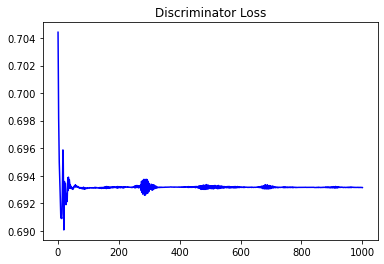

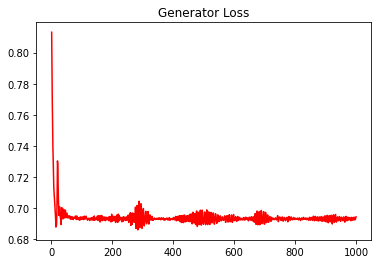

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.031240583778877624


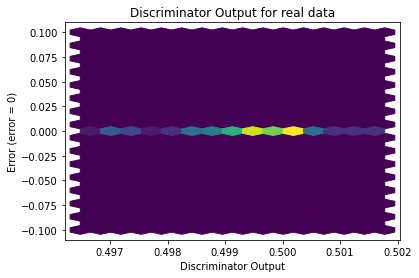

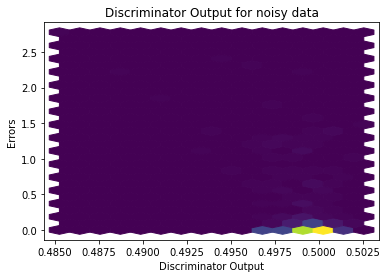

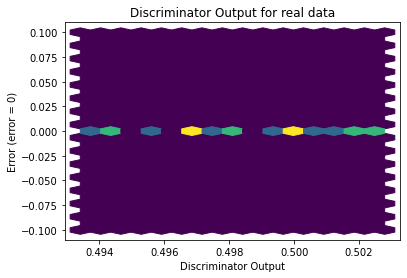

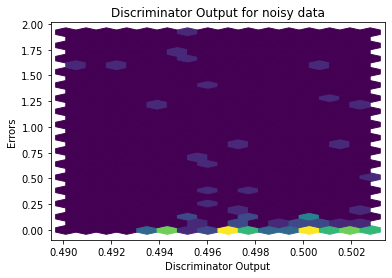

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3166]], requires_grad=True)
